In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from FileCounter import fileCount
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.functional as F
import numpy as np
import os

import cv2

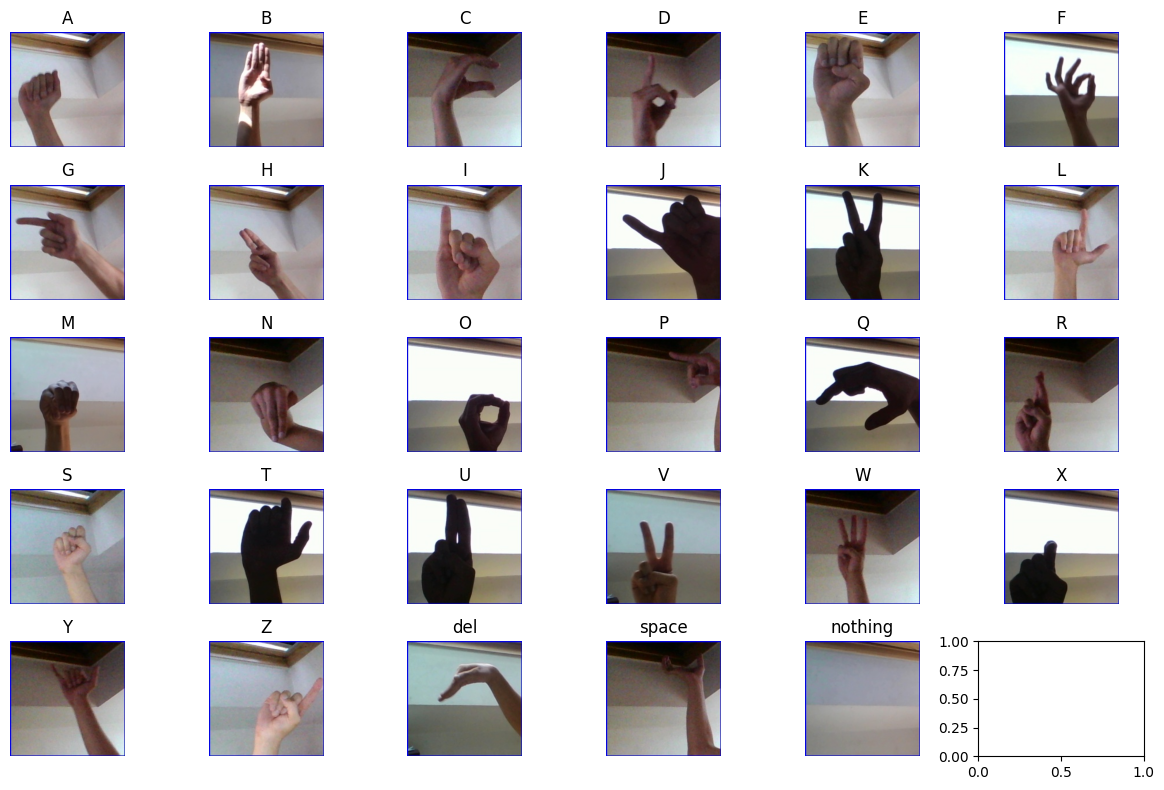

{'A': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/A/A1418.jpg', 'B': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/B/B542.jpg', 'C': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/C/C2060.jpg', 'D': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/D/D2238.jpg', 'E': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/E/E1590.jpg', 'F': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/F/F2855.jpg', 'G': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/G/G1121.jpg', 'H': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/H/H1391.jpg', 'I': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/I/I1869.jpg', 'J': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/J/J2906.jpg', 'K': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/K/K2516.jpg', 'L': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/L/L1783.jpg', 'M': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/M/M567.jpg', 'N': 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/N/N2485.jpg', 'O': 'a

In [2]:
# Path to the directory containing the images
directory = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'

# List of letters to display
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
           'Y', 'Z', 'del', 'space', 'nothing']

# Create a grid of subplots
num_rows = 5
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

image_paths = {}

# Iterate over letters and plot one example from each
for i, letter in enumerate(letters):
    row = i // num_cols
    col = i % num_cols
    
    # Find the first image of the current letter
    image_files = os.listdir(os.path.join(directory, letter))
    image_path = os.path.join(directory, letter, image_files[3])
    image_paths[letter] = image_path
    
    # Load and plot the image
    image = plt.imread(image_path)
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(letter)

plt.tight_layout()
plt.show()

print(image_paths)

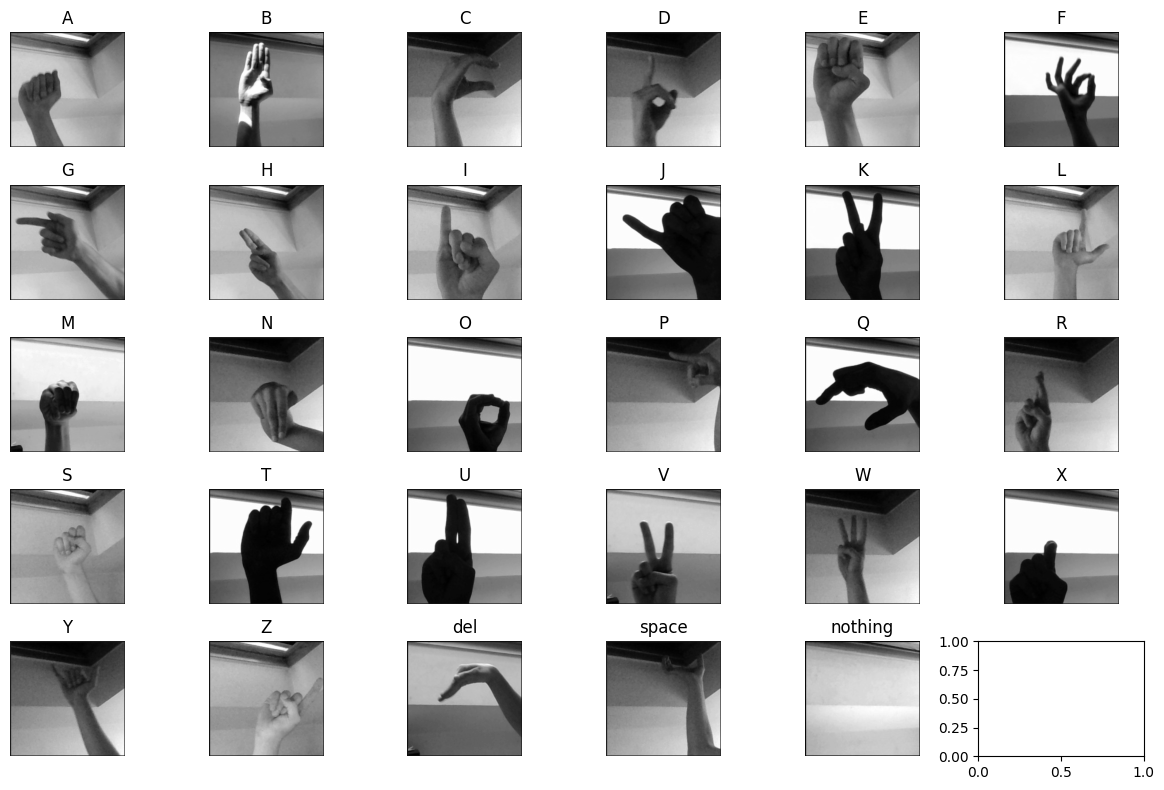

In [3]:
# Create a grid of subplots
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Adjust the figsize if needed

# Iterate over the letters and their corresponding image paths
for i, (letter, image_path) in enumerate(image_paths.items()):
    row = i // num_cols
    col = i % num_cols
    
    # Load the original image
    image = plt.imread(image_path)
    
    # Apply Gaussian blur
    # blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Convert to grayscale
    # gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply thresholding
    # _, thresholded_image = cv2.threshold(gray_image, 90, 255, cv2.THRESH_TOZERO_INV)
    
    # Plot the thresholded image
    axes[row, col].imshow(gray_image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(letter)

plt.tight_layout()
plt.show()

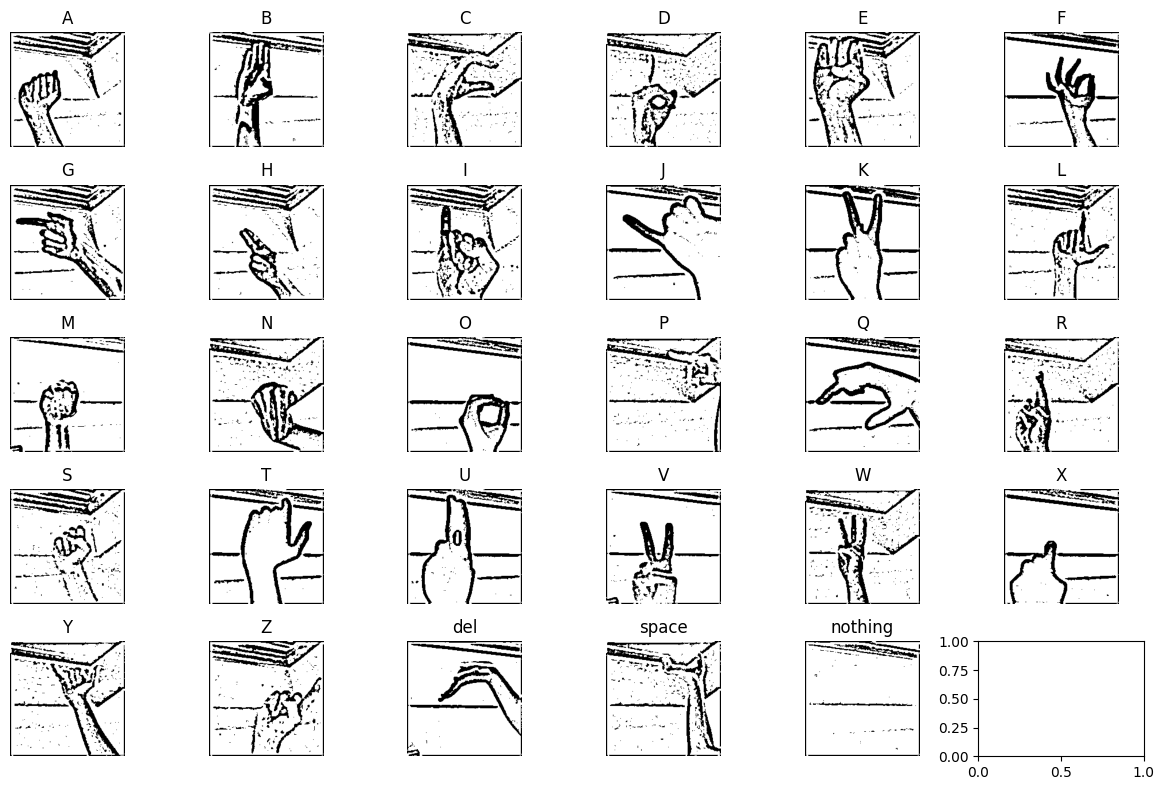

In [4]:
# Create a grid of subplots
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # Adjust the figsize if needed

# Iterate over the letters and their corresponding image paths
for i, (letter, image_path) in enumerate(image_paths.items()):
    row = i // num_cols
    col = i % num_cols
    
    # Load the original image
    image = plt.imread(image_path)
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)
    
    # adaptive_kernel_size = int(image.shape[0] / 50)  # Adjust the kernel size based on image size
    adaptive_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    
     # Apply adaptive morphological operations
    opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, adaptive_kernel)
    closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, adaptive_kernel)
    thresholded_image = cv2.adaptiveThreshold(closed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)



    
    
    # Plot the dilated image
    axes[row, col].imshow(thresholded_image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(letter)


plt.tight_layout()
plt.show()

In [9]:
def process_images(src_dir, dest_dir, letters):
    for letter in letters:
        letter_directory = os.path.join(src_dir, letter)
        image_files = [file for file in os.listdir(letter_directory) if file.startswith(letter)]

        segmented_directory = f'{dest_dir}/{letter}'
        os.makedirs(segmented_directory, exist_ok=True)

        for image_file in image_files:
            image_path = os.path.join(letter_directory, image_file)
            image = plt.imread(image_path)

            # Apply the segmentation operations (Gaussian blur, grayscale conversion, morphological operations, thresholding)
            blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
            gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
            adaptive_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
            opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, adaptive_kernel)
            closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, adaptive_kernel)
            thresholded_image = cv2.adaptiveThreshold(closed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)

            # Save the segmented image in the segmented directory
            segmented_image_path = os.path.join(segmented_directory, image_file)
            cv2.imwrite(segmented_image_path, thresholded_image)


In [10]:
# Path to the directory containing the images
train_src = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
train_dest = 'ASL-alphabet_processed/asl_alphabet_train'

test_src = 'asl-alphabet/asl_alphabet_test/asl_alphabet_test'
test_dest = 'ASL-alphabet_processed/asl_alphabet_test'



# List of letters to display
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
           'Y', 'Z', 'del', 'space', 'nothing']



In [11]:
process_images(test_src, test_dest, letters)

In [12]:
process_images(train_src, train_dest, letters)

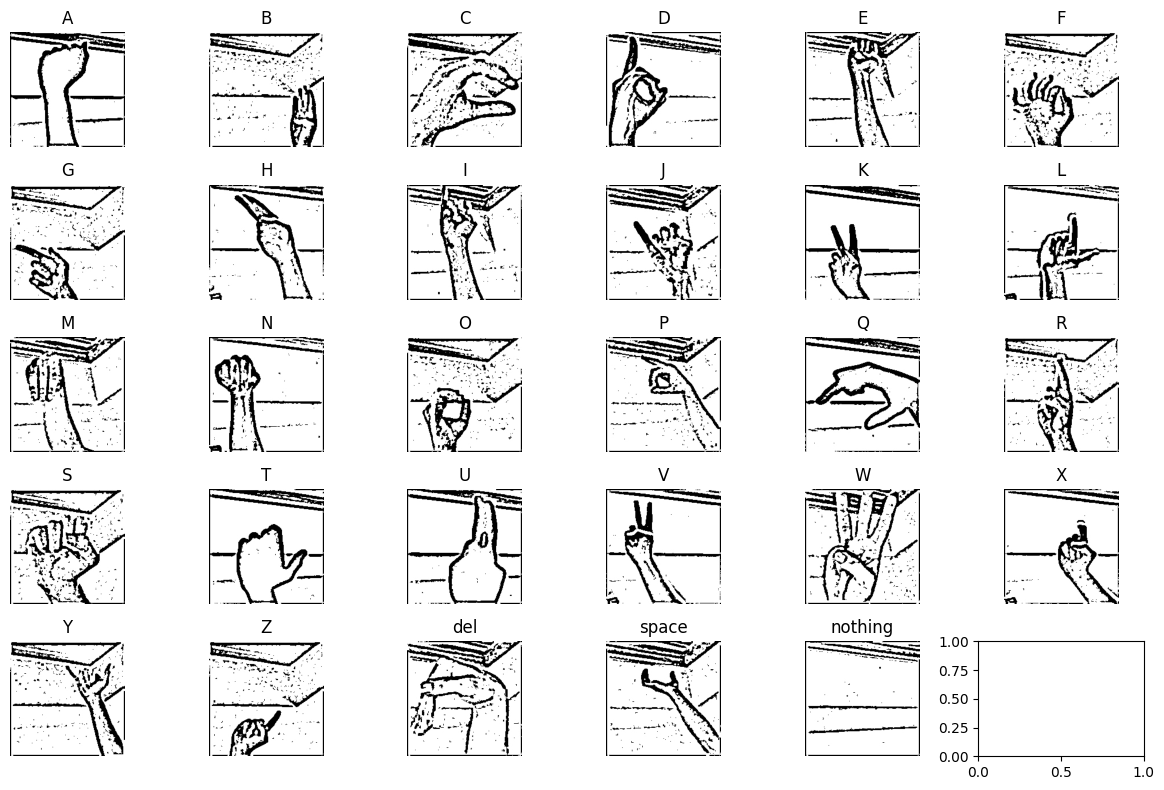

{'A': 'ASL-alphabet_processed/asl_alphabet_train/A/A2510.jpg', 'B': 'ASL-alphabet_processed/asl_alphabet_train/B/B2387.jpg', 'C': 'ASL-alphabet_processed/asl_alphabet_train/C/C2213.jpg', 'D': 'ASL-alphabet_processed/asl_alphabet_train/D/D671.jpg', 'E': 'ASL-alphabet_processed/asl_alphabet_train/E/E1228.jpg', 'F': 'ASL-alphabet_processed/asl_alphabet_train/F/F2097.jpg', 'G': 'ASL-alphabet_processed/asl_alphabet_train/G/G2346.jpg', 'H': 'ASL-alphabet_processed/asl_alphabet_train/H/H670.jpg', 'I': 'ASL-alphabet_processed/asl_alphabet_train/I/I1130.jpg', 'J': 'ASL-alphabet_processed/asl_alphabet_train/J/J1523.jpg', 'K': 'ASL-alphabet_processed/asl_alphabet_train/K/K2745.jpg', 'L': 'ASL-alphabet_processed/asl_alphabet_train/L/L524.jpg', 'M': 'ASL-alphabet_processed/asl_alphabet_train/M/M1828.jpg', 'N': 'ASL-alphabet_processed/asl_alphabet_train/N/N570.jpg', 'O': 'ASL-alphabet_processed/asl_alphabet_train/O/O2373.jpg', 'P': 'ASL-alphabet_processed/asl_alphabet_train/P/P1332.jpg', 'Q': 'ASL-a

In [17]:
# Path to the directory containing the images
directory = 'ASL-alphabet_processed/asl_alphabet_train'

# List of letters to display
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
           'Y', 'Z', 'del', 'space', 'nothing']

# Create a grid of subplots
num_rows = 5
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

image_paths = {}

# Iterate over letters and plot one example from each
for i, letter in enumerate(letters):
    row = i // num_cols
    col = i % num_cols
    
    # Find the first image of the current letter
    image_files = os.listdir(os.path.join(directory, letter))
    image_path = os.path.join(directory, letter, image_files[5])
    image_paths[letter] = image_path
    
    # Load and plot the image
    image = plt.imread(image_path)
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(letter)

plt.tight_layout()
plt.show()

print(image_paths)